In [1]:
import sys
import localSettings as ls
print(ls.main_path)

/Users/cerati/Notebooks/PELEE/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
SHRCALIBFACTOR = 1.00

In [4]:
# USING BDT?
USEBDT = True

In [5]:
# cale to MCC8 CV?
MCC8WEIGHTS = False

In [6]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [7]:
fold = "nuselection"
tree = "NeutrinoSelectionFilter"

R3BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_G1_beam_good_reco2_1e19'
R3EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_G_all_reco2'
R3NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2'
R3NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'
R3DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'
R3NCPI0  = 'prodgenie_nc_pi0_uboone_overlay_mcc9.1_v08_00_00_26_run3_G_reco2'
R3CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run3_G_reco2'
R3CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run3_reco2_reco2'
R3CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run3_reco2_reco2'
R3NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_new_run3_reco2_reco2'
R3NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_New_run3_reco2_reco2'

#ls.ntuple_path = "/Users/cerati/Notebooks/PELEE/root_files/0218/"

ur3mc = uproot.open(ls.ntuple_path+R3NU+".root")[fold][tree]
ur3ncpi0 = uproot.open(ls.ntuple_path+R3NCPI0+".root")[fold][tree]
ur3ccpi0 = uproot.open(ls.ntuple_path+R3CCPI0+".root")[fold][tree]
ur3nue = uproot.open(ls.ntuple_path+R3NUE+".root")[fold][tree]
ur3data = uproot.open(ls.ntuple_path+R3BNB+".root")[fold][tree]
ur3ext = uproot.open(ls.ntuple_path+R3EXT+".root")[fold][tree]
ur3dirt = uproot.open(ls.ntuple_path+R3DRT+".root")[fold][tree]
ur3lee = uproot.open(ls.ntuple_path+R3NUE+".root")[fold][tree]
ur3ccnopi = uproot.open(ls.ntuple_path+R3CCNOPI+".root")[fold][tree]
ur3cccpi = uproot.open(ls.ntuple_path+R3CCCPI+".root")[fold][tree]
ur3ncnopi = uproot.open(ls.ntuple_path+R3NCNOPI+".root")[fold][tree]
ur3nccpi = uproot.open(ls.ntuple_path+R3NCCPI+".root")[fold][tree]

R1BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19'
R1EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C_all_reco2'
#R1EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C1_C2_D1_D2_E1_E2_all_reco2' #Run1 + Run2
R1NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2'
R1NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'
R1DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'
R1NCPI0  = 'prodgenie_nc_pi0_uboone_overlay-v08_00_00_26_run1_reco2_reco2'
R1CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run1_reco2'
R1CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run1_reco2_reco2'
R1CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
R1NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
R1NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'
    
ur1mc = uproot.open(ls.ntuple_path+R1NU+".root")[fold][tree]
ur1ncpi0 = uproot.open(ls.ntuple_path+R1NCPI0+".root")[fold][tree]
ur1ccpi0 = uproot.open(ls.ntuple_path+R1CCPI0+".root")[fold][tree]
ur1nue = uproot.open(ls.ntuple_path+R1NUE+".root")[fold][tree]
ur1data = uproot.open(ls.ntuple_path+R1BNB+".root")[fold][tree]
ur1ext = uproot.open(ls.ntuple_path+R1EXT+".root")[fold][tree]
ur1dirt = uproot.open(ls.ntuple_path+R1DRT+".root")[fold][tree]
ur1lee = uproot.open(ls.ntuple_path+R1NUE+".root")[fold][tree]
ur1ccnopi = uproot.open(ls.ntuple_path+R1CCNOPI+".root")[fold][tree]
ur1cccpi = uproot.open(ls.ntuple_path+R1CCCPI+".root")[fold][tree]
ur1ncnopi = uproot.open(ls.ntuple_path+R1NCNOPI+".root")[fold][tree]
ur1nccpi = uproot.open(ls.ntuple_path+R1NCCPI+".root")[fold][tree]

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", "category",
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    #"shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    "crtveto","crthitpe","_closestNuCosmicDist",
    "NeutrinoEnergy2",
    #"run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    #"pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    "shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    "shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V"
]
#make the list unique
variables = list(set(variables))
print(variables)

variables.remove("_closestNuCosmicDist")
variables.remove("crtveto")
variables.remove("crthitpe")

WEIGHTS = ["weightSpline","weightTune","weightSplineTimesTune"]#, "weightsGenie", "weightsFlux", "weightsReint"]
WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
           "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
           "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

r3nue = ur3nue.pandas.df(variables + WEIGHTS, flatten=False)
r3mc = ur3mc.pandas.df(variables + WEIGHTS + MCFVARS, flatten=False)
r3ncpi0 = ur3ncpi0.pandas.df(variables + WEIGHTS, flatten=False)
r3ccpi0 = ur3ccpi0.pandas.df(variables + WEIGHTS, flatten=False)
r3ccnopi = ur3ccnopi.pandas.df(variables + WEIGHTS, flatten=False)
r3cccpi = ur3cccpi.pandas.df(variables + WEIGHTS, flatten=False)
r3ncnopi = ur3ncnopi.pandas.df(variables + WEIGHTS, flatten=False)
r3nccpi = ur3nccpi.pandas.df(variables + WEIGHTS, flatten=False)
r3data = ur3data.pandas.df(variables, flatten=False)
r3ext = ur3ext.pandas.df(variables, flatten=False)
r3dirt = ur3dirt.pandas.df(variables + WEIGHTS, flatten=False)
r3lee = ur3lee.pandas.df(variables + WEIGHTSLEE, flatten=False)

r3lee["is_signal"] = r3lee["category"] == 11
r3data["is_signal"] = r3data["category"] == 11
r3nue["is_signal"] = r3nue["category"] == 11
r3mc["is_signal"] = r3mc["category"] == 11
r3dirt["is_signal"] = r3dirt["category"] == 11
r3ext["is_signal"] = r3ext["category"] == 11
r3ncpi0["is_signal"] = r3ncpi0["category"] == 11
r3ccpi0["is_signal"] = r3ccpi0["category"] == 11
r3ccnopi["is_signal"] = r3ccnopi["category"] == 11
r3cccpi["is_signal"] = r3cccpi["category"] == 11
r3ncnopi["is_signal"] = r3ncnopi["category"] == 11
r3nccpi["is_signal"] = r3nccpi["category"] == 11
r3lee.loc[r3lee['category'] == 1, 'category'] = 111
r3lee.loc[r3lee['category'] == 10, 'category'] = 111
r3lee.loc[r3lee['category'] == 11, 'category'] = 111

uproot_v = [ur3lee,ur3mc,ur3ncpi0,ur3ccpi0,ur3ccnopi,ur3cccpi,ur3ncnopi,ur3nccpi,ur3nue,ur3ext,ur3data,ur3dirt]
df_v = [r3lee,r3mc,r3ncpi0,r3ccpi0,r3ccnopi,r3cccpi,r3ncnopi,r3nccpi,r3nue,r3ext,r3data,r3dirt]
for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel

if (USEBDT == True):
    train_r3ccpi0, r3ccpi0 = train_test_split(r3ccpi0, test_size=0.5, random_state=1990)
    
r1nue = ur1nue.pandas.df(variables + WEIGHTS, flatten=False)
r1mc = ur1mc.pandas.df(variables + WEIGHTS + MCFVARS, flatten=False)
r1ncpi0 = ur1ncpi0.pandas.df(variables + WEIGHTS, flatten=False)
r1ccpi0 = ur1ccpi0.pandas.df(variables + WEIGHTS, flatten=False)
r1ccnopi = ur1ccnopi.pandas.df(variables + WEIGHTS, flatten=False)
r1cccpi = ur1cccpi.pandas.df(variables + WEIGHTS, flatten=False)
r1ncnopi = ur1ncnopi.pandas.df(variables + WEIGHTS, flatten=False)
r1nccpi = ur1nccpi.pandas.df(variables + WEIGHTS, flatten=False)
r1data = ur1data.pandas.df(variables, flatten=False)
r1ext = ur1ext.pandas.df(variables, flatten=False)
r1dirt = ur1dirt.pandas.df(variables + WEIGHTS, flatten=False)
r1lee = ur1lee.pandas.df(variables + WEIGHTSLEE, flatten=False)

r1lee["is_signal"] = r1lee["category"] == 11
r1data["is_signal"] = r1data["category"] == 11
r1nue["is_signal"] = r1nue["category"] == 11
r1mc["is_signal"] = r1mc["category"] == 11
r1dirt["is_signal"] = r1dirt["category"] == 11
r1ext["is_signal"] = r1ext["category"] == 11
r1ncpi0["is_signal"] = r1ncpi0["category"] == 11
r1ccpi0["is_signal"] = r1ccpi0["category"] == 11
r1ccnopi["is_signal"] = r1ccnopi["category"] == 11
r1cccpi["is_signal"] = r1cccpi["category"] == 11
r1ncnopi["is_signal"] = r1ncnopi["category"] == 11
r1nccpi["is_signal"] = r1nccpi["category"] == 11
r1lee.loc[r1lee['category'] == 1, 'category'] = 111
r1lee.loc[r1lee['category'] == 10, 'category'] = 111
r1lee.loc[r1lee['category'] == 11, 'category'] = 111

uproot_v = [ur1lee,ur1mc,ur1ncpi0,ur1ccpi0,ur1ccnopi,ur1cccpi,ur1ncnopi,ur1nccpi,ur1nue,ur1ext,ur1data,ur1dirt]
df_v = [r1lee,r1mc,r1ncpi0,r1ccpi0,r1ccnopi,r1cccpi,r1ncnopi,r1nccpi,r1nue,r1ext,r1data,r1dirt]
for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel

nue = pd.concat([r3nue,r1nue],ignore_index=True)
mc = pd.concat([r3mc,r1mc],ignore_index=True)
ncpi0 = pd.concat([r3ncpi0,r1ncpi0],ignore_index=True)
ccpi0 = pd.concat([r3ccpi0,r1ccpi0],ignore_index=True)
ccnopi = pd.concat([r3ccnopi,r1ccnopi],ignore_index=True)
cccpi = pd.concat([r3cccpi,r1cccpi],ignore_index=True)
ncnopi = pd.concat([r3ncnopi,r1ncnopi],ignore_index=True)
nccpi = pd.concat([r3nccpi,r1nccpi],ignore_index=True)
data = pd.concat([r3data,r1data],ignore_index=True)
ext = pd.concat([r3ext,r1ext],ignore_index=True)
dirt = pd.concat([r3dirt,r1dirt],ignore_index=True)
lee = pd.concat([r3lee,r1lee],ignore_index=True)


['shr_tkfit_nhits_U', 'trk_len', 'shrsubclusters1', 'reco_nu_vtx_sce_y', 'CosmicIP', 'tksh_angle', 'trk_pid_chipr_v', 'n_showers_contained', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_x', 'pion_e', 'shr_tkfit_gap10_nhits_Y', 'tksh_distance', 'shr_bkt_pdg', 'true_e_visible', 'trk_bkt_E', 'mc_pdg', 'n_tracks_contained', 'reco_nu_vtx_sce_z', 'shrclusfrac1', 'nu_e', 'shr_energy', 'shr_tkfit_gap10_nhits_U', '_opfilter_pe_veto', 'trk_score', 'nu_flashmatch_score', 'pi0_e', 'shr_theta', 'secondshower_Y_vtxdist', 'run', 'trk_bkt_pdg', 'secondshower_Y_dot', 'secondshower_Y_nhit', 'best_obviouscosmic_flashmatch_score', 'shr_hits_tot', 'matched_E', 'category', 'shr_dedx_U', 'shrclusfrac2', 'shr_tkfit_2cm_dedx_V', 'trk_llr_pid_score_v', 'shr_dedx_Y', '_opfilter_pe_beam', 'slnhits', 'trk_phi', 'shr_tkfit_2cm_nhits_V', 'shr_tkfit_gap10_dedx_U', 'trk_chipr', 'npion', 'reco_nu_vtx_z', 'pi0truth_elec_etot', 'CosmicDirAll3D', 'shr_score', 'shrsubclusters0', 'shr_phi', 'shrmoliererms', 'shr_tkfit_dedx_V', 'shr_tk

In [8]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,dirt]

for i,df in enumerate(df_v):
    
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
    #df['weightSpline']  = df['weightSpline']  * df['weightTune']

In [9]:
# adjust from MCC9 CV to MCC8 CV

if (MCC8WEIGHTS == True):

    # scaling for QE
    CV_bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5.0]
    CV_scaling = [2.5,2.0,1.7,1.45,1.3,1.25,1.175,1.15,1.14,1.1]
    # scaling for RES

    mc.loc[ (mc['interaction'] == 10), 'weightSpline' ] = 2 * mc['weightSpline']
    ncpi0.loc[ (ncpi0['interaction'] == 10), 'weightSpline' ] = 2 * ncpi0['weightSpline']
    ccpi0.loc[ (ccpi0['interaction'] == 10), 'weightSpline' ] = 2 * ccpi0['weightSpline']
    ccnopi.loc[ (ccnopi['interaction'] == 10), 'weightSpline' ] = 2 * ccnopi['weightSpline']
    cccpi.loc[ (cccpi['interaction'] == 10), 'weightSpline' ] = 2 * cccpi['weightSpline']
    ncnopi.loc[ (ncnopi['interaction'] == 10), 'weightSpline' ] = 2 * ncnopi['weightSpline']
    nccpi.loc[ (nccpi['interaction'] == 10), 'weightSpline' ] = 2 * nccpi['weightSpline']
    nue.loc[ (nue['interaction'] == 10), 'weightSpline' ] = 2 * nue['weightSpline']
    lee.loc[ (lee['interaction'] == 10), 'weightSpline' ] = 2 * lee['weightSpline']
    dirt.loc[ (dirt['interaction'] == 10), 'weightSpline' ] = 2 * dirt['weightSpline']

    for i, CV_bin in enumerate(CV_bins):

        if i == 0:
            continue

        mc.loc[ (mc['nu_e'] > CV_bins[i-1]) & (mc['nu_e'] < CV_bins[i]) & (mc['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * mc['weightSpline']
        nue.loc[ (nue['nu_e'] > CV_bins[i-1]) & (nue['nu_e'] < CV_bins[i]) & (nue['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * nue['weightSpline']
        ncpi0.loc[ (nc['nu_e'] > CV_bins[i-1]) & (ncpi0['nu_e'] < CV_bins[i]) & (ncpi0['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ncpi0['weightSpline']
        ccpi0.loc[ (ccpi0['nu_e'] > CV_bins[i-1]) & (ccpi0['nu_e'] < CV_bins[i]) & (ccpi0['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ccpi0['weightSpline']
        ccnopi.loc[ (ccnopi['nu_e'] > CV_bins[i-1]) & (ccnopi['nu_e'] < CV_bins[i]) & (ccnopi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ccnopi['weightSpline']
        cccpi.loc[ (cccpi['nu_e'] > CV_bins[i-1]) & (cccpi['nu_e'] < CV_bins[i]) & (cccpi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * cccpi['weightSpline']
        ncnopi.loc[ (ncnopi['nu_e'] > CV_bins[i-1]) & (ncnopi['nu_e'] < CV_bins[i]) & (ncnopi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * ncnopi['weightSpline']
        nccpi.loc[ (nccpi['nu_e'] > CV_bins[i-1]) & (nccpi['nu_e'] < CV_bins[i]) & (nccpi['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * nccpi['weightSpline']
        lee.loc[ (lee['nu_e'] > CV_bins[i-1]) & (lee['nu_e'] < CV_bins[i]) & (lee['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * lee['weightSpline']
        dirt.loc[ (dirt['nu_e'] > CV_bins[i-1]) & (dirt['nu_e'] < CV_bins[i]) & (dirt['interaction'] == 0), 'weightSpline' ] = CV_scaling[i-1] * dirt['weightSpline']



In [10]:
# how to get the LLR-PID value for the "track candidate" (proton for nue selection, muon for numu)
# can be done for any variable
# code from Giuseppe!

df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
#df_v = [lee,mc,nue,ext,data,dirt]

for i,df in enumerate(df_v):
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']
    df['trkfit'] = df['shr_tkfit_npointsvalid'] / df['shr_tkfit_npoints']
    # and the 2d angle difference
    df['anglediff_Y'] = np.abs(df['secondshower_Y_dir']-df['shrclusdir2'])
    #df['anglediff_V'] = np.abs(df['secondshower_V_dir']-df['shrclusdir1'])
    #df['anglediff_U'] = np.abs(df['secondshower_U_dir']-df['shrclusdir0'])


In [11]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])
    df['shr_tkfit_dedx_avg'] = (df['shr_tkfit_nhits_Y']*df['shr_tkfit_dedx_Y'] + df['shr_tkfit_nhits_U']*df['shr_tkfit_dedx_U'] + df['shr_tkfit_nhits_V']*df['shr_tkfit_dedx_V'])/df['shr_tkfit_nhits_tot']
    df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])
    df['shr_tkfit_2cm_dedx_avg'] = (df['shr_tkfit_2cm_nhits_Y']*df['shr_tkfit_2cm_dedx_Y'] + df['shr_tkfit_2cm_nhits_U']*df['shr_tkfit_2cm_dedx_U'] + df['shr_tkfit_2cm_nhits_V']*df['shr_tkfit_2cm_dedx_V'])/df['shr_tkfit_2cm_nhits_tot']
    df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])
    df['shr_tkfit_gap10_dedx_avg'] = (df['shr_tkfit_gap10_nhits_Y']*df['shr_tkfit_gap10_dedx_Y'] + df['shr_tkfit_gap10_nhits_U']*df['shr_tkfit_gap10_dedx_U'] + df['shr_tkfit_gap10_nhits_V']*df['shr_tkfit_gap10_dedx_V'])/df['shr_tkfit_gap10_nhits_tot']
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [12]:
INTERCEPT = 0.0
SLOPE = 0.83

# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["reco_e_qe"] = 0.938*((df["shr_energy"]+INTERCEPT)/SLOPE)/(0.938 - ((df["shr_energy"]+INTERCEPT)/SLOPE)*(1-np.cos(df["shr_theta"])))
    df["reco_e_rqe"] = df["reco_e_qe"]/df["reco_e"]

# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])
data["bnbdata"] = np.ones_like(data["shr_energy"])
ext["extdata"] = np.ones_like(ext["shr_energy"])

/Users/cerati/miniconda3/envs/mypython3new/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# avoid double-counting of events out of FV in the NC/CC pi0 samples
# not needed anymore since we improved matching with filtered samples
#ncpi0 = ncpi0.query('category != 5')
#ccpi0 = ccpi0.query('category != 5')
#ccnopi = ccnopi.query('category != 5')
#nccpi = nccpi.query('category != 5')
#ncnopi = ncnopi.query('category != 5')

## avoid recycling unbiased ext events (i.e. selecting a slice with little nu content from these samples)
ccnopi = ccnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
cccpi = cccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
ncnopi = ncnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
nccpi = nccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')

# add back the cosmic category, for background only
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [14]:
# variables to be trained on
TRAINVAR = [#"n_showers_contained",
            "shr_score","tksh_distance","tksh_angle",
            #"shr_tkfit_dedx_avg",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D",
            ]

In [131]:
LABELS = ['bkg','pi0','nonpi0']

if (USEBDT == True):
    #for label, bkg_query in zip(nue_booster.labels, nue_booster.bkg_queries):
    for label, bkg_query in zip(LABELS, nue_booster.bkg_queries):
        with open(ls.pickle_path+'booster_%s_test8.pickle' % label, 'rb') as booster_file:
            booster = pickle.load(booster_file)
            mc[label+"_score"] = booster.predict(
                xgb.DMatrix(mc[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nue[label+"_score"] = booster.predict(
                xgb.DMatrix(nue[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ext[label+"_score"] = booster.predict(
                xgb.DMatrix(ext[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            data[label+"_score"] = booster.predict(
                xgb.DMatrix(data[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            dirt[label+"_score"] = booster.predict(
                xgb.DMatrix(dirt[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            lee[label+"_score"] = booster.predict(
                xgb.DMatrix(lee[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ncpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ccpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ccnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            cccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(cccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ncnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(nccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)


In [132]:
dfbdt_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]

In [133]:
import plotter
import importlib
importlib.reload(plotter)

<module 'plotter' from '/Users/cerati/Notebooks/PELEE/plotter.py'>

In [134]:
samples = {
    "mc": mc,
    "nue": nue,
    "data": data,
    "ext": ext,
    "dirt": dirt,
    "ncpi0": ncpi0,
    "ccpi0": ccpi0,
    "ccnopi": ccnopi,
    "cccpi": cccpi,
    "ncnopi": ncnopi,
    "nccpi": nccpi,
    "lee": lee
}

#scaling = 101.0/4.21 #0218
scaling = 101.0/4.84 #0304
#scaling = 1

SPLIT = 1.0
if (USEBDT == True):
    SPLIT = 1.48

#''' 0218
#weights = {
#    "mc": 1.60e-02 * scaling,
#    "ext": 3.74e-02 * scaling,
#    "nue": 3.33e-04 * scaling,
#    "lee": 3.33e-04 * scaling,
#    "dirt": 6.51e-02 * scaling,
#    "ncpi0": 8.45e-03 * scaling,
#    "ccpi0": 4.23e-03 * scaling,
#    "ncnopi": 5.22e-03 * scaling,
#    "nccpi": 2.07e-03 * scaling,
#    "ccnopi": 7.30e-03 * scaling,
#    "cccpi": 3.70e-03 * scaling,
#}
#pot = 4.21e19*scaling
#''' 0304
weights = {
    "mc": 1.83e-02 * scaling,
    "ext": 7.16e-02 * scaling, #Run1,2,3: 3.97e-02; Run1,3: 7.16e-02
    "nue": 4.18e-04 * scaling,
    "lee": 4.18e-04 * scaling,
    "dirt": 7.48e-02 * scaling,
    "ncpi0": 9.77e-03 * scaling,
    "ccpi0": 4.87e-03 * SPLIT * scaling,
    "ncnopi": 4.61e-03 * scaling,
    "nccpi": 2.12e-03 * scaling,
    "ccnopi": 5.33e-03 * scaling,
    "cccpi": 4.26e-03 * scaling,
}
pot = 4.84e19*scaling
#'''
my_plotter = plotter.Plotter(samples, weights, pot=pot)
print(weights)

{'mc': 0.3818801652892562, 'ext': 1.4941322314049585, 'nue': 0.008722727272727273, 'lee': 0.008722727272727273, 'dirt': 1.560909090909091, 'ncpi0': 0.2038780991735537, 'ccpi0': 0.15040652892561984, 'ncnopi': 0.0962004132231405, 'nccpi': 0.044239669421487604, 'ccnopi': 0.11122520661157025, 'cccpi': 0.08889669421487603}


In [135]:
# nue preselection
PRESQ = 'nslice == 1'
PRESQ += ' and selected == 1'
PRESQ += ' and shr_energy_tot_cali > 0.07'
PRESQ += ' and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)'

In [136]:
# 1eNp preselection
NPPRESQ = PRESQ
NPPRESQ += ' and n_tracks_contained > 0'

In [137]:
# loose box cuts
NPLCUTQ = NPPRESQ
NPLCUTQ += ' and CosmicIPAll3D > 20.'
NPLCUTQ += ' and trkpid < 0.1'
NPLCUTQ += ' and hits_ratio > 0.5'
NPLCUTQ += ' and shr_score < 0.40'
NPLCUTQ += ' and n_showers_contained == 1'
NPLCUTQ += ' and tksh_distance < 6.0'
NPLCUTQ += ' and shr_tkfit_dedx_max < 4.5'
NPLCUTQ += ' and tksh_angle > -0.9'

In [138]:
# tight box cuts
NPTCUTQ = NPLCUTQ
NPTCUTQ += ' and CosmicIPAll3D > 30.'
NPTCUTQ += ' and CosmicDirAll3D > -0.98 and CosmicDirAll3D < 0.98'
NPTCUTQ += ' and trkpid < 0.02'
NPTCUTQ += ' and hits_ratio > 0.65'
NPTCUTQ += ' and shr_score < 0.25'
NPTCUTQ += ' and shrmoliereavg > 2 and shrmoliereavg < 10'
NPTCUTQ += ' and subcluster > 7'
NPTCUTQ += ' and trkfit < 0.70'
NPTCUTQ += ' and n_showers_contained == 1'
NPTCUTQ += ' and tksh_distance < 4.0'
NPTCUTQ += ' and trkshrhitdist2 < 1.5'
NPTCUTQ += ' and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 1.0 and shr_tkfit_dedx_max < 3.8)'
NPTCUTQ += ' and (secondshower_Y_nhit<=8 or secondshower_Y_dot<=0.8 or anglediff_Y<=40 or secondshower_Y_vtxdist>=100)'
NPTCUTQ += ' and secondshower_Y_nhit < 30'
NPTCUTQ += ' and tksh_angle > -0.9 and tksh_angle < 0.70'

In [139]:
# OLD loose box cuts
OLCUTQ = PRESQ
OLCUTQ += ' and CosmicIP > 20.'
OLCUTQ += ' and trkpid < 0.1'
OLCUTQ += ' and hits_ratio > 0.5'
OLCUTQ += ' and shr_score < 0.30'
OLCUTQ += ' and n_showers_contained == 1'
OLCUTQ += ' and tksh_distance < 6.0'
OLCUTQ += ' and shr_tkfit_2cm_dedx_avg < 4.0'
OLCUTQ += ' and tksh_angle > -0.9'
# OLD tight box cuts
OTCUTQ = OLCUTQ
OTCUTQ += ' and tksh_distance < 3.5'
OTCUTQ += ' and (shr_tkfit_2cm_dedx_Y > 0 and shr_tkfit_2cm_dedx_Y < 4.0 and shr_tkfit_2cm_dedx_U < 4.0 and shr_tkfit_2cm_dedx_V < 4.0)'
OTCUTQ += ' and (shr_tkfit_gap10_dedx_Y > 0 and shr_tkfit_gap10_dedx_Y < 4.5 and shr_tkfit_gap10_dedx_U < 4.5 and shr_tkfit_gap10_dedx_V < 4.5)'
OTCUTQ += ' and tksh_angle > -0.9 and tksh_angle < 0.75'
OTCUTQ += ' and shrmoliereavg > 2 and shrmoliereavg < 9'
OTCUTQ += ' and trkpid < -0.02'
OTCUTQ += ' and n_showers_contained == 1'
OTCUTQ += ' and shr_score < 0.275'
OTCUTQ += ' and hits_ratio > 0.60'
OTCUTQ += ' and (secondshower_Y_nhit<=8 or secondshower_Y_dot<=0.8 or anglediff_Y<=40 or secondshower_Y_vtxdist>=100)'
OTCUTQ += ' and (trkfit < 0.45 or subcluster > 6)'

In [148]:
# BDT cuts
BDTCQ = NPPRESQ #NPLCUTQ
#BDTCQ += ' and pi0_score > 0.9 and nonpi0_score > 0.92'
#BDTCQ += ' and pi0_score > 0.89 and nonpi0_score > 0.87'
#BDTCQ += ' and pi0_score > 0.89 and nonpi0_score > 0.86' #0.4/4, all weight 1
#BDTCQ += ' and bkg_score > 0.9' #0.2/6, mc,ext weight 2
#BDTCQ += ' and bkg_score > 0.82'
BDTCQ += ' and n_showers_contained == 1'
BDTCQ += ' and tksh_angle > -0.9'
#BDTCQ += ' and trkfit < 0.70'
#BDTCQ += ' and trkpid < 0.1'
#BDTCQ += ' and subcluster > 4'
#BDTCQ += ' and shr_tkfit_dedx_avg < 4.5'
#BDTCQ += ' and CosmicIPAll3D > 20.'
#BDTCQ += ' and hits_ratio > 0.5'
##BDTCQ += ' and shr_score < 0.4'
#BDTCQ += ' and shrmoliereavg < 10'
##BDTCQ += ' and tksh_distance < 4.0'
#BDTCQ += ' and trkshrhitdist2 < 2.0'
#BDTCQ += ' and pi0_score > 0.85 and nonpi0_score > 0.76' #test2: 0.3/6/n_showers_contained == 1
#BDTCQ += ' and pi0_score > 0.82 and nonpi0_score > 0.82' #test3: same as test2 but reco_e<0.8
#BDTCQ += ' and pi0_score > 0.88 and nonpi0_score > 0.76' #test4: same as test3 with using "max"
BDTCQ += ' and CosmicIPAll3D > 10.'
BDTCQ += ' and trkpid < 0.2'
BDTCQ += ' and hits_ratio > 0.50'
BDTCQ += ' and shrmoliereavg < 10'
BDTCQ += ' and subcluster > 4'
BDTCQ += ' and trkfit < 0.70'
BDTCQ += ' and tksh_distance < 5.0'
BDTCQ += ' and trkshrhitdist2 < 2.5'
BDTCQ += ' and shr_tkfit_dedx_max > 0. and shr_tkfit_dedx_max < 4.5'
BDTCQ += ' and secondshower_Y_nhit < 50'
#BDTCQ += ' and pi0_score > 0.86 and nonpi0_score > 0.82' #test5: same as test4 but with the above cuts in training
#BDTCQ += ' and pi0_score > 0.83 and nonpi0_score > 0.86' #test6: same as test5 but eta=0.25
#BDTCQ += ' and pi0_score > 0.89 and nonpi0_score > 0.88' #test7: same as test5 but subsample = 0.5, eta = 0.2, max_depth = 7, max_delta_step = 0 (was min_child_weight = 1?)
BDTCQ += ' and pi0_score > 0.80 and nonpi0_score > 0.85' #test8: same as test5 but using half of run2 ext in training (instead of 95%), also cosmic train_weight = 10, subsample = 0.75
#BDTCQ += ' and bkg_score > 0.92'

In [149]:
# Define actual selection
QUERY = BDTCQ
# in case you do not want to look at the data
QUERY += ' and bnbdata==0'
# in case you want to apply the CRT veto
#if ISRUN3: QUERY += ' and (crtveto!=1) and (_closestNuCosmicDist > 20.)'

Profile likelihood: 2.30 sigma @ 1.01e21 POT
s/sqrt(b): 2.59 sigma @ 1.01e21 POT


(0, 25.211858006740428)

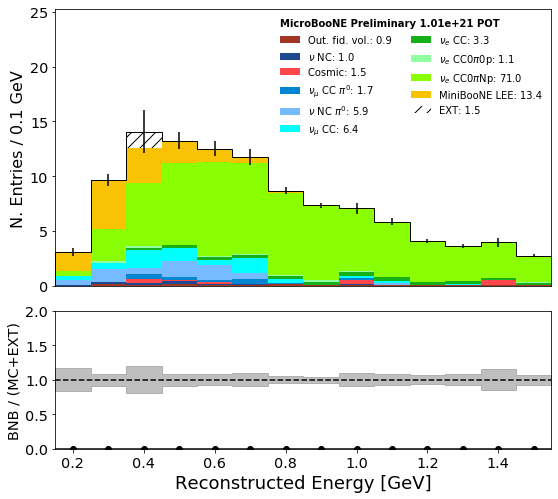

In [150]:
miniboone_bins = [
    0, 0.200, 0.300, 0.375, 0.475, 0.550, 0.675, 0.800, 0.950, 1.100, 1.300,
    1.500, 3.000
]

asymm_bins = [0,500,1000,2000,4000,10000]

#VARIABLE, BINS, RANGE, XTIT = 'reco_e',12,(0.2,1.4),"Reconstructed Energy [GeV]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',14,(0.15,1.55),"Reconstructed Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_mass_Y',20,(0,500),"pi0 mass Y"

fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="event_category",
    #kind="interaction",
    #kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE,
)[0:3]

print("Profile likelihood: %.2f sigma @ 1.01e21 POT" % my_plotter.significance_likelihood)
print("s/sqrt(b): %.2f sigma @ 1.01e21 POT" % my_plotter.significance)

ax1.set_ylim(0,ax1.get_ylim()[1]*1.5)

#ax1.set_ylim(0,11)
#ax1.set_yscale("log")
#ax1.set_ylim(0,230)
#ax2.set_ylim(0.5,1.5)
#fig.savefig(ls.plots_path+"run1/presel/"+VARIABLE+".pdf")

pi0_score 30 (0.7, 1) $\pi^0$ BDT response
Error calculating the significance operands could not be broadcast together with shapes (30,) (16,) (30,) 
nonpi0_score 30 (0.7, 1) non-$\pi^0$ BDT response


/Users/cerati/miniconda3/envs/mypython3new/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error calculating the significance operands could not be broadcast together with shapes (30,) (15,) (30,) 


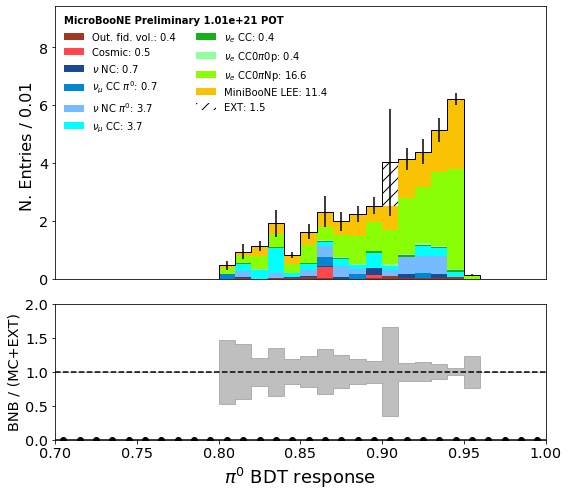

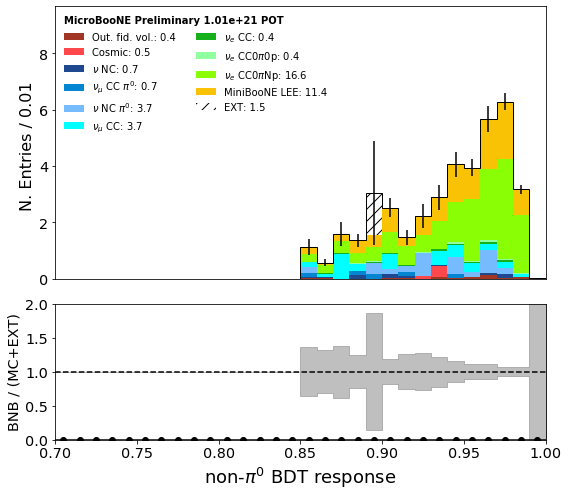

In [151]:
PQUERY = QUERY
#PQUERY += ' and reco_e > 0.15 and reco_e < 1.55'
PQUERY += ' and reco_e > 0.15 and reco_e < 0.55'
#PQUERY += ' and shr_tkfit_dedx_Y < 0'
plots = []
plots.append(['tksh_distance',20,(0,10),"tksh distance [cm]"])
#plots.append(['shr_tkfit_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_Y',20,(0,10),"shr tkfit dE/dx (Y, 1-5 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_U',20,(0,10),"shr tkfit dE/dx (U, 1-5 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_V',20,(0,10),"shr tkfit dE/dx (V, 1-5 cm) [MeV/cm]"])
plots.append(['shr_tkfit_dedx_avg',20,(0,10),"shr tkfit dE/dx (avg, 0-4 cm) [MeV/cm]"])
plots.append(['shr_tkfit_dedx_max',20,(0,10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_dedx_avg',20,(0,10),"shr tkfit dE/dx (avg, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_2cm_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 0-2 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_dedx_avg',20,(0,10),"shr tkfit dE/dx (avg, 1-5 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_gap10_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 1-5 cm) [MeV/cm]"])
plots.append(['tksh_angle',20,(-1,1),"cos(tksh angle)"])
plots.append(['trkfit',20,(0,1),"Fraction of Track-fitted points"])
plots.append(['shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"])
plots.append(['trkpid',15,(-1,1),"track LLR PID"])
#plots.append(['n_showers_contained',10,(0,10),"n showers contained"])
#plots.append(['n_tracks_contained',10,(0,10),"n tracks contained"])
plots.append(['shr_score',20,(0,0.5),"shr score"])
#plots.append(['trk_score',20,(0.5,1.0),"trk score"])
plots.append(['hits_ratio',20,(0,1),"shower hits/all hits"])
plots.append(['slclustfrac',20,(0,1),"slice clustered fraction"])
plots.append(['CosmicIP',20,(0,200),"Cosmic IP from vtx [cm]"])
#plots.append(['reco_nu_vtx_x',20,(0,260),"x"])
#plots.append(['reco_nu_vtx_y',20,(-120,120),"y"])
#plots.append(['reco_nu_vtx_z',20,(0,1100),"z"])
#plots.append(['reco_e_rqe',20,(0,2),"rqe"])
plots.append(['trkshrhitdist2',20,(0,10),"2D trk-shr distance (Y)"])
plots.append(['subcluster',20,(0,20),"N sub-clusters in shower"])
#plots.append(['shrmoliererms',20,(0,5000),"RMS Moliere angle [degrees]"])
#plots.append(['shr_energy_tot_cali',20,(0,1),"shr energy (calibrated) [GeV]"])
#plots.append(['contained_fraction',20,(0.,1),"contained fraction"])
#plots.append(['hits_y',20,(0.,1000),"N hits Y plane"])
#plots.append(['pi0_mass_Y',25,(-50.,200),"pi0 mass [Mev]"])
#plots.append(['pi0_gammadot',20,(-1,1),"2-shower angle"])
plots.append(['secondshower_Y_nhit',20,(0,200),"Nhit 2nd shower (Y)"])
plots.append(['secondshower_Y_dot',20,(-1,1),"cos(2nd shower direction wrt vtx) (Y)"])
plots.append(['anglediff_Y',20,(0,350),"angle diff 1st-2nd shower (Y) [degrees]"])
plots.append(['secondshower_Y_vtxdist',20,(0.,200),"vtx dist 2nd shower (Y)"])
#plots.append(['trackcaloenergy',15,(0,300),"Track Calo Energy [Mev]"])
plots.append(['CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"])
plots.append(['CosmicDirAll3D',20,(-1,1),"cos(CosmicDirAll3D)"])
#plots = []
#plots.append(['shr_tkfit_dedx_avg',20,(1,5),"shr tkfit dE/dx (avg, 0-4 cm) [MeV/cm]"])
#plots.append(['shr_tkfit_dedx_mh_avg',20,(1,5),"shr tkfit dE/dx (maxHit, 0-4 cm) [MeV/cm]"])
if USEBDT:
    plots = []
    #plots.append(['bkg_score',20,(0.8,1),"all-bkg BDT response"])
    plots.append(['pi0_score',30,(0.7,1),"$\pi^0$ BDT response"])
    plots.append(['nonpi0_score',30,(0.7,1),"non-$\pi^0$ BDT response"])
    #plots.append(['cc_score',40,(0.,1),"cc score"])
    #plots.append(['cosmic_score',40,(0.,1),"cosmic score"])
    #plots.append(['ext_score',40,(0.,1),"ext score"])
    #plots.append(['ccpi0_score',40,(0.,1),"ccpi0 score"])
    #plots.append(['ncpi0_score',40,(0.,1),"ncpi0 score"])
for VARIABLE, BINS, RANGE, XTIT in plots:
    print(VARIABLE, BINS, RANGE, XTIT)
    fig, ax1, ax2 = my_plotter.plot_variable(
        VARIABLE,   
        query=PQUERY,
        kind="event_category",
        #kind="interaction",
        #kind="sample",
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
    )[0:3]
    ax1.set_ylim(0,ax1.get_ylim()[1]*1.4)
    #ax1.set_yscale("log")
    fig.show()
    #fig.savefig(ls.plots_path+"0109/run1/presel/"+VARIABLE+date_time+".pdf")

In [ ]:
QUERY += ' and reco_e > 0.2 and reco_e < 0.8 and npi0==0 and ccnc==1'# and npion>0
QUERY += " and nu_pdg == 14"
#QUERY += " and ~(pi0truth_elec_etot>=15 or muon_e<0.3)"
print(QUERY)
mc.query(QUERY)[["run","sub","evt","reco_e","slnunhits","slnhits","ccnc","nu_e","npi0","npion","nproton","proton_e","nneutron","muon_e","pi0truth_elec_etot"]]


In [ ]:
# create output files based on selection
fname_v = [NUE,NU,PI0,NUE,EXT,BNB,DRT]

for i,name in enumerate(fname_v):
    if (i == 0):
        continue # skip LEE event. This one will be done within SBNFit
        
    df = dfbdt_v[i]

    fout = open(ls.ntuple_path+name+'.txt','w')
    dfsel = df.query(QUERY)
    print ('file %s has %i selected entries'%(name,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run'].values[0]
        sub = row['sub'].values[0]
        evt = row['evt'].values[0]
        fout.write('%i %i %i \n'%(run,sub,evt))
    fout.close()

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt

BINS = np.linspace(0,1,25)
VAR = 'cosmic_score'

nueplot = nue.query(QUERY)
nueplotecut = nueplot.query('nu_e < 0.8')

fig = plt.figure(figsize=(6,6))
plt.hist(nueplot[VAR].values,bins=BINS,histtype='step',lw=2,color='red',label='all nue')
plt.hist(nueplotecut[VAR].values,bins=BINS,histtype='step',lw=2,color='m',label='nue < 0.8 GeV')
#plt.hist(nue[VAR].values,bins=BINS,histtype='step',lw=2,color='green')
plt.grid()
plt.legend()
plt.title(VAR)
plt.show()

BINS2D = (np.linspace(0,3.0,25),BINS)

fig = plt.figure(figsize=(6,6))
plt.hist2d(nueplot['nu_e'].values,nueplot[VAR].values,bins=BINS2D)
#plt.hist(nue[VAR].values,bins=BINS,histtype='step',lw=2,color='green')
plt.grid()
plt.show()

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt

x_range = (0.1,0.8)
n_bins = 7

n_tot = np.empty([50, n_bins])
n_cv_tot = np.empty(n_bins)
n_tot.fill(0)
n_cv_tot.fill(0)
score_cut = 0.997

my_cmap = cm.get_cmap('viridis')

for t in samples:
    if t in ["ext", "data", "lee"]:
        continue
    tree = samples[t]
    
    extra_query = ""
    if t == "mc":
        extra_query = "& ~(nu_pdg == 12 & ccnc == 0) & ~(npi0 != 0 & ccnc == 1)"
        
    queried_tree = tree.query("selected==1 & global_score > %g %s & interaction == 1" % (score_cut, extra_query))
    variable = queried_tree["reco_e"]
    genie_weights = queried_tree["weightsGenie"]
    spline_fix = queried_tree["weightSpline"]*weights[t]

    s = genie_weights
    df = pd.DataFrame(s.values.tolist())


    n_cv, bins = np.histogram(
        variable,
        range=x_range,
        bins=n_bins,
        weights=spline_fix)
    
    n_cv_tot += n_cv

    if not df.empty:
        for i in range(50):
            weight = df[i].values
            weight[np.isnan(weight)] = 1
            weight[weight > 100] = 1

            n, bins = np.histogram(
                variable, weights=weight*spline_fix, range=x_range, bins=n_bins)

            n_tot[i] += n

        
bincenters = 0.5 * (bins[1:] + bins[:-1])

left,right = bins[:-1],bins[1:]
X = np.array([left,right]).T.flatten()
Y = np.array([n_cv_tot,n_cv_tot]).T.flatten()
plt.plot(X,Y,color='r',linewidth=2,label='Central value')

    
cov = np.empty([len(n_cv), len(n_cv)])
cov.fill(0)

my_norm = Normalize(vmin=min((sum(n) for n in n_tot)), vmax=max((sum(n) for n in n_tot)))

for n in n_tot:
    left,right = bins[:-1],bins[1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([n,n]).T.flatten()
    plt.plot(X,Y,color=my_cmap(my_norm(sum(n))),zorder=-32)
    for i in range(len(n_cv)):
        for j in range(len(n_cv)):
            cov[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov /= 50
            
frac_cov = np.empty([len(n_cv), len(n_cv)])
corr = np.empty([len(n_cv), len(n_cv)])

for i in range(len(n_cv)):
    for j in range(len(n_cv)):
        frac_cov[i][j] = cov[i][j] / (n_cv_tot[i] * n_cv_tot[j])
        corr[i][j] = cov[i][j] / np.sqrt(cov[i][i] * cov[j][j])

        
plt.errorbar(
    bincenters, 
    n_cv_tot,
    yerr=np.sqrt(np.diag(cov)), 
    fmt='none', 
    ecolor='r',
    linewidth=2,
    label='GENIE sys. uncertainties')

print(np.sqrt(np.diag(cov))/n_cv_tot)
plt.xlim(x_range[0], x_range[1])
plt.xlabel(r"$E_{deposited}$ [GeV]")
plt.legend()
plt.ylim(ymin=0)
plt.tight_layout()
plt.savefig("plots/spec.pdf", transparent=True)

In [ ]:
fig, ax = plt.subplots(1, 1)
pos = ax.imshow(frac_cov, origin='lower', cmap='viridis')
ax.set_title("Fractional covariance matrix")
ax.set_ylabel("Bin number")
ax.set_xlabel("Bin number")
fig.colorbar(pos)
fig.tight_layout()
fig.savefig("plots/frac.pdf", transparent=True)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_title("Correlation matrix")
pos = ax.imshow(corr, origin='lower', cmap='inferno')
ax.set_ylabel("Bin number")
ax.set_xlabel("Bin number")
fig.colorbar(pos)
fig.tight_layout()
fig.savefig("plots/corr.pdf", transparent=True)

In [ ]:
my_plotter.plot_2d(
    "global_score",
    "ncpi0_score",
    query="selected==1",
    bins_x=50,
    bins_y=50,
    range_x=(0., 1),
    range_y=(0., 1))